In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

SEED = 462
np.random.seed(SEED)

data_path = os.path.join("..", "data", "tabular")

In [2]:
class Dataset:
    """
    This class is taken directly from our previous submission.
    """
    def __init__(self, train_path=None, test_path=None):
        self.train_path = train_path
        self.test_path = test_path
    
    def load_csv(self, path):
        data = pd.read_csv(path).to_numpy()
        X, Y_str = data[:, :-1], data[:, -1]  # separate data and target
        n_examples = len(Y_str)
        Y = np.zeros(n_examples)
        for i in range(n_examples):
            category = Y_str[i]
            if category == "banana":
                Y[i] = 0
            elif category == "carrot":
                Y[i] = 1
            elif category == "cucumber":
                Y[i] = 2
            elif category == "mandarin":
                Y[i] = 3
            else:
                Y[i] = 4
        
        return X.astype(float), Y.astype(float)
    
    def get_data(self):
        X_train, Y_train = self.load_csv(self.train_path)
        X_test, Y_test   = self.load_csv(self.test_path)
        
        return (X_train, Y_train), (X_test, Y_test)

In [3]:
dataset = Dataset(
    train_path=os.path.join(data_path, "train_processed.csv"),
    test_path=os.path.join(data_path, "test_processed.csv")
)

(X_train, y_train), (X_test, y_test) = dataset.get_data()

# Only use when dataset is not already normalized
# X_train = StandardScaler().fit_transform(X_train)

print(np.mean(X_train), np.std(X_train))

feat_cols_train = ['feature'+str(i) for i in range(X_train.shape[1])]
normalised_train = pd.DataFrame(X_train,columns=feat_cols_train)
normalised_train.tail()

0.028301886792452848 0.840566206113305


,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature96,feature97,feature98,feature99,feature100,feature101,feature102,feature103,feature104,feature105
3485,0.037058,-0.892437,-0.853279,-0.785172,-0.974276,-0.894686,-0.194773,-0.100563,-0.303624,-0.602996,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3486,-0.366712,-0.236922,-0.020249,0.335127,0.591421,0.623267,0.451739,0.034959,-0.316667,-0.155741,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3487,-1.022839,-0.930255,-0.954252,-0.988863,-0.681503,-0.631240,-0.617492,-0.494809,-1.503547,-1.602745,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3488,-0.909278,-0.842013,-0.828035,-0.925209,-0.974276,-0.869596,-0.891016,-0.938336,-1.020969,-1.037098,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3489,1.172662,1.200169,1.241917,0.958929,0.515046,-0.141982,-0.754254,-1.332582,-0.603605,-0.747697,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
pca_train = PCA(n_components=3)
principal_components_train = pca_train.fit_transform(X_train)
principal_train_Df = pd.DataFrame(data = principal_components_train)
principal_train_Df.columns = [f'PC {i}' for i in range(len(principal_train_Df.columns))]   

print('Explained variability per principal component: {}'.format(pca_train.explained_variance_ratio_))

principal_train_Df.tail()

Explained variability per principal component: [0.44218898 0.11171843 0.06066092]


,PC 0,PC 1,PC 2
3485,-5.353066,1.658779,0.139394
3486,-4.709475,3.899986,-1.583527
3487,-4.335660,-3.332717,-3.443294
3488,1.376255,-5.119061,-1.278018
3489,-5.360911,1.662636,0.519372


In [5]:

# pca_expl_var_Df = pd.DataFrame(data=pca_expl_var)

# Reconstruction Error
errors = []
k_range = range(1, min(X_train.shape))

for k in k_range:
    # Explained variance
    pca = PCA(n_components=0.95).fit(X_train)
    X_reconstruct = pca.inverse_transform(pca.transform(X_train))
    error = mean_squared_error(X_train, X_reconstruct)
    errors.append(error)

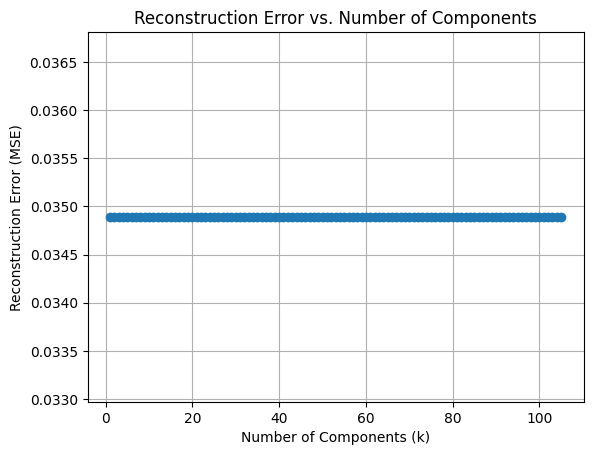

In [6]:
plt.plot(k_range, errors, marker='o')
plt.xlabel('Number of Components (k)')
plt.ylabel('Reconstruction Error (MSE)')
plt.title('Reconstruction Error vs. Number of Components')
plt.grid()
plt.show()